In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('confidences.pkl', 'rb') as handle:
    confidences = pickle.load(handle)

In [12]:
confidences['forebrain']["ivelo"]

CellID
10X_17_028:AACCATGGTAATCACCx    0.948153
10X_17_028:AACCATGCATACTACGx    0.966768
10X_17_028:AAACCTGGTAAAGGAGx    0.976235
10X_17_028:AAAGTAGCAAAGTCAAx    0.971833
10X_17_028:AAAGCAACAAACGCGAx    0.970396
                                  ...   
10X_17_029:TTTATGCGTTGCGCACx    0.970956
10X_17_029:TTTGCGCGTTCCGTCTx    0.954229
10X_17_029:TTTGGTTGTACCCAATx    0.905696
10X_17_029:TTTCCTCCAGTCCTTCx    0.969709
10X_17_029:TTTGCGCCACAGATTCx    0.962093
Name: velocity_confidence, Length: 1720, dtype: float64

In [15]:
# models and datasets
models = ["celldancer", "imVelo", "ivelo", "velovi", "scvelo", "stochastic"]
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]

# Check for missing data
missing_combinations = []

for dataset in datasets:
    for model in models:
        # Check if dataset exists in confidences
        if dataset not in confidences or model not in confidences[dataset]:
            missing_combinations.append(f"Dataset: {dataset}, Model: {model}")

# Print missing combinations
if missing_combinations:
    print("The following dataset-model combinations do not have data:")
    for combination in missing_combinations:
        print(combination)
else:
    print("All dataset-model combinations have data.")


All dataset-model combinations have data.


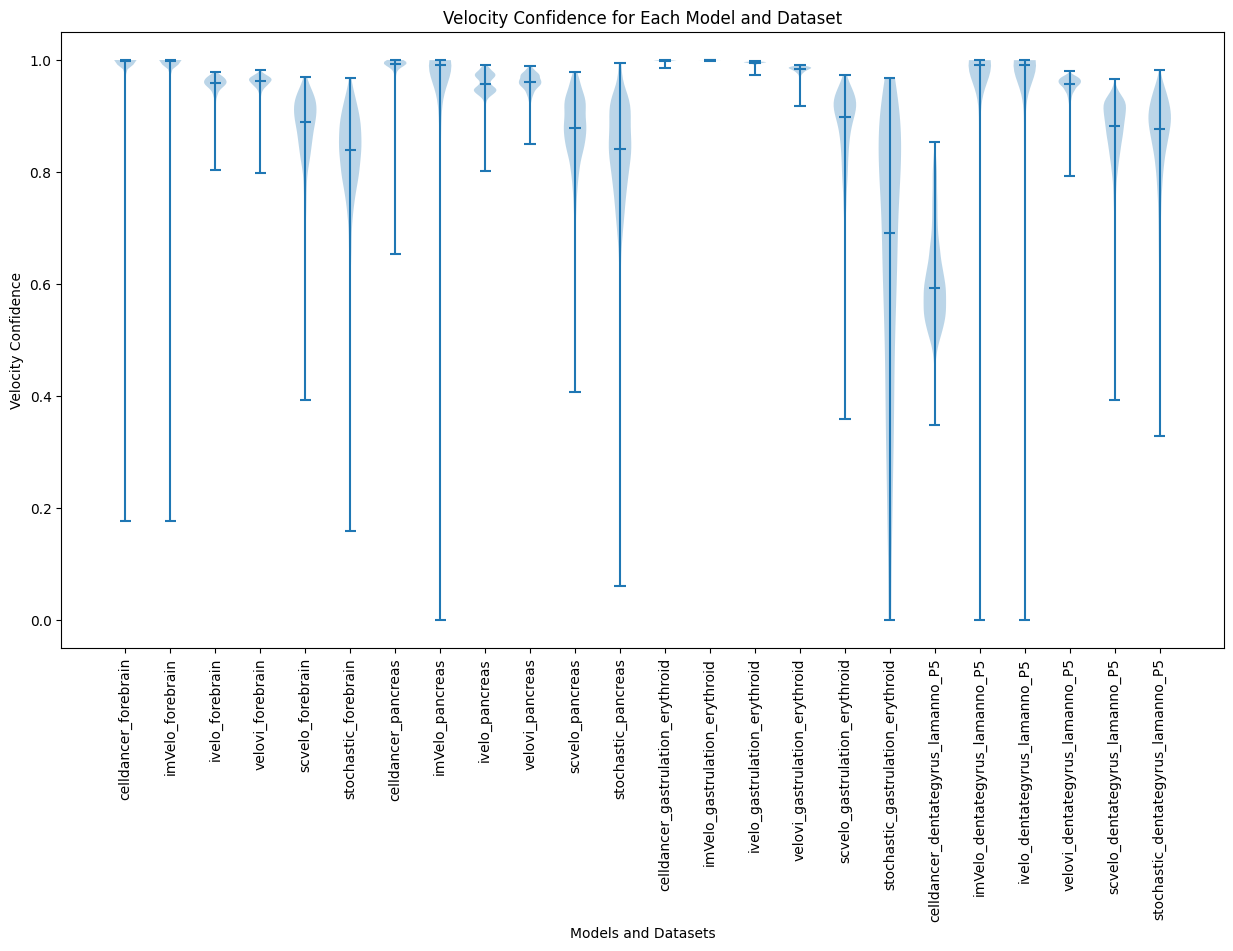

In [18]:
import matplotlib.pyplot as plt

# models and datasets
models = ["celldancer", "imVelo", "ivelo", "velovi", "scvelo", "stochastic"]
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]

# Prepare data for plotting
all_confidences = []
all_labels = []

for dataset in datasets:
    for model in models:
        if dataset in confidences and model in confidences[dataset]:
            # Convert the Pandas Series to a list before appending
            confidence_data = confidences[dataset][model].tolist()
            if len(confidence_data) > 0:
                all_confidences.append(confidence_data)
                all_labels.append(f"{model}_{dataset}")
        else:
            print(f"No data for model: {model} in dataset: {dataset}")

# Check if we have any valid data to plot
if all_confidences:
    # Create the violin plot
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.violinplot(all_confidences, showmeans=False, showmedians=True)

    # Set x-ticks and labels
    ax.set_xticks(range(1, len(all_labels) + 1))
    ax.set_xticklabels(all_labels, rotation=90)

    ax.set_title('Velocity Confidence for Each Model and Dataset')
    ax.set_xlabel('Models and Datasets')
    ax.set_ylabel('Velocity Confidence')

    plt.savefig("confidences.png", bbox_inches="tight")
    plt.show()
else:
    print("No valid data available for plotting.")


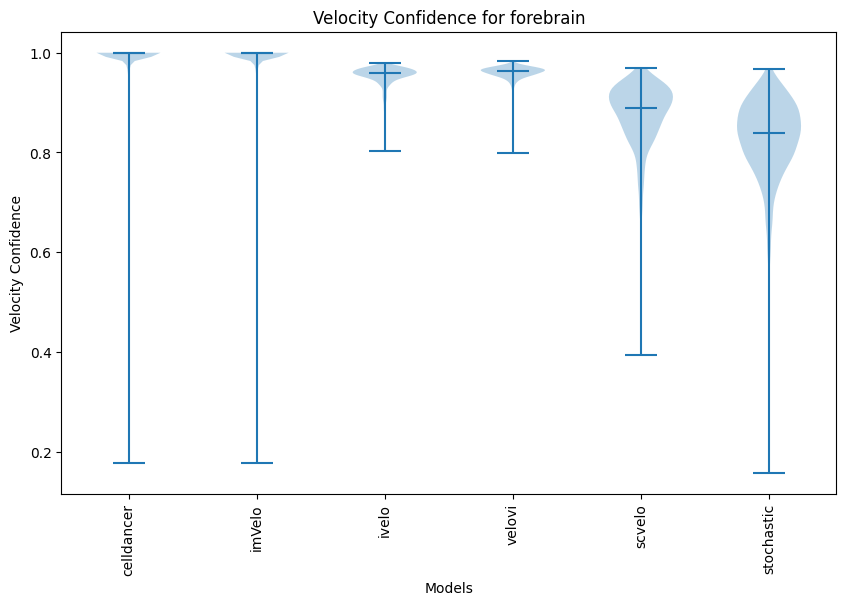

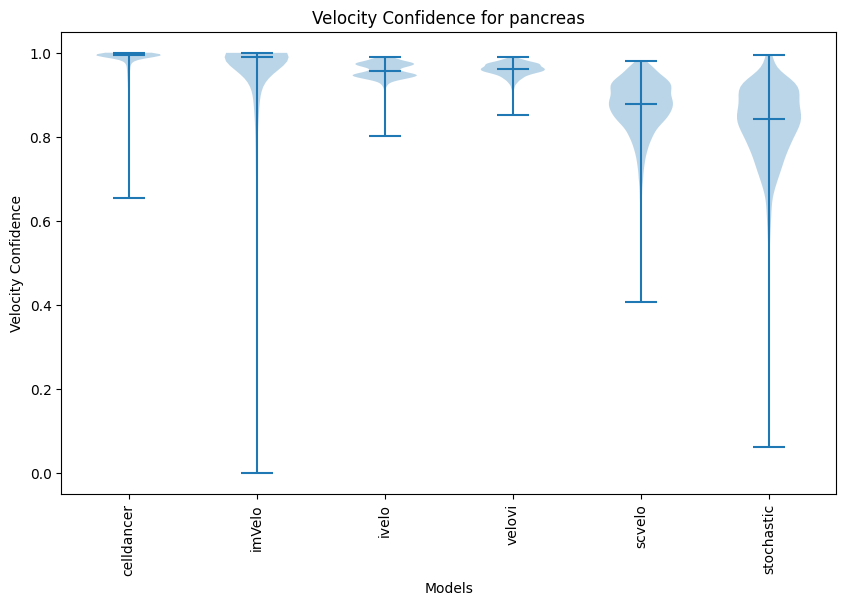

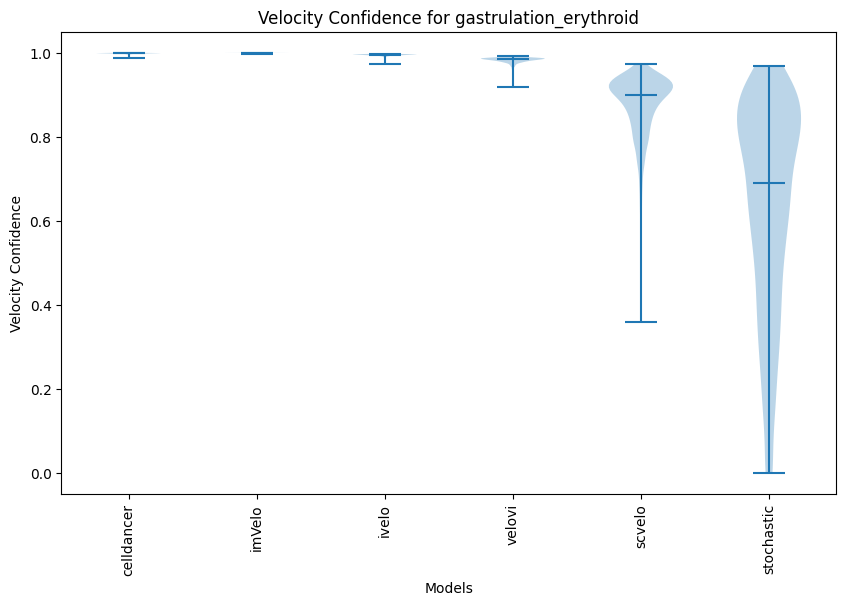

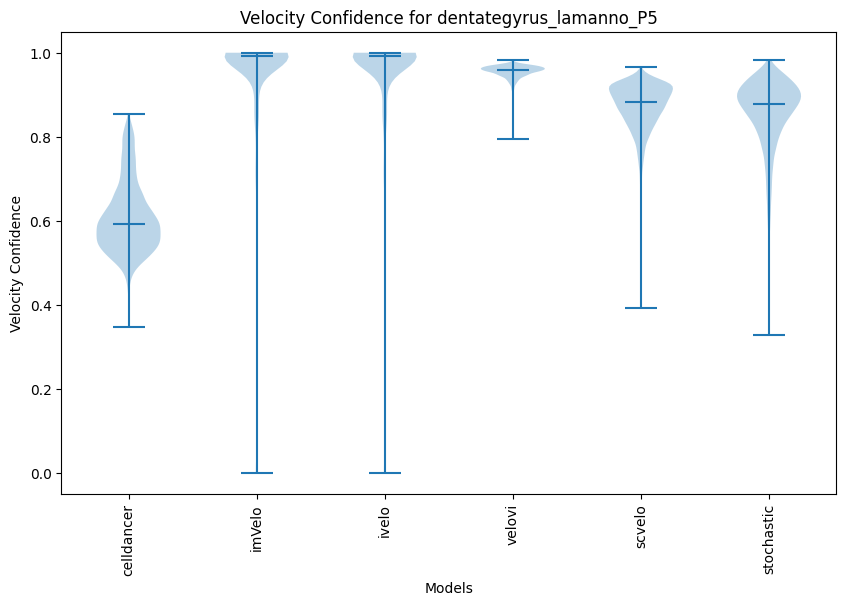

In [17]:
import matplotlib.pyplot as plt

# models and datasets
models = ["celldancer", "imVelo", "ivelo", "velovi", "scvelo", "stochastic"]
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]

for dataset in datasets:
    all_confidences = []
    all_labels = []
    
    # Prepare data for this dataset
    for model in models:
        if dataset in confidences and model in confidences[dataset]:
            # Convert the Pandas Series to a list before appending
            confidence_data = confidences[dataset][model].tolist()
            if len(confidence_data) > 0:
                all_confidences.append(confidence_data)
                all_labels.append(model)
        else:
            print(f"No data for model: {model} in dataset: {dataset}")

    # Create the violin plot for this dataset
    if all_confidences:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.violinplot(all_confidences, showmeans=False, showmedians=True)

        # Set x-ticks and labels
        ax.set_xticks(range(1, len(all_labels) + 1))
        ax.set_xticklabels(all_labels, rotation=90)

        ax.set_title(f'Velocity Confidence for {dataset}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Velocity Confidence')

        # Save the plot for this dataset
        plt.savefig(f"{dataset}_confidences.png", bbox_inches="tight")
        plt.show()
    else:
        print(f"No valid data available for plotting for dataset: {dataset}")
